# MLB Ağ Analizi (Network Analysis)

Bu notebook'ta MLB takımları arasındaki maç verilerini kullanarak ağ analizi yapacağız.

## 1. Gerekli Kütüphanelerin Import Edilmesi

In [24]:
# Gerekli kütüphaneleri import edelim
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Türkçe karakter desteği için
plt.rcParams['font.family'] = 'DejaVu Sans'

## 2. MLB Teams CSV Dosyasının Okunması

In [27]:
# mlb_teams.csv dosyasını okuyalım
teams_df = pd.read_csv('mlb_teams.csv', encoding='utf-16')
print("MLB Teams Veri Seti:")
print(f"Toplam takım sayısı: {len(teams_df)}")
print("\nİlk 10 satır:")
teams_df.head(10)

MLB Teams Veri Seti:
Toplam takım sayısı: 30

İlk 10 satır:


,league,division,team,prefix_1,prefix_2
0,mlb,AL Central,Chicago White Sox,chw,chicago-white-sox
1,mlb,AL Central,Cleveland Indians,cle,cleveland-indians
2,mlb,AL Central,Detroit Tigers,det,detroit-tigers
3,mlb,AL Central,Kansas City Royals,kc,kansas-city-royals
4,mlb,AL Central,Minnesota Twins,min,minnesota-twins
5,mlb,AL East,Baltimore Orioles,bal,baltimore-orioles
6,mlb,AL East,Boston Red Sox,bos,boston-red-sox
7,mlb,AL East,New York Yankees,nyy,new-york-yankees
8,mlb,AL East,Tampa Bay Rays,tb,tampa-bay-rays
9,mlb,AL East,Toronto Blue Jays,tor,toronto-blue-jays


## 3. MLB Games CSV Dosyasının Okunması

In [32]:
# mlb_games.csv dosyasını okuyalım
games_df = pd.read_csv('mlb_games.csv',encoding='utf-16')
print("MLB Games Veri Seti:")
print(f"Toplam maç sayısı: {len(games_df)}")
print("\nSütunlar:", games_df.columns.tolist())
print("\nİlk 10 satır:")
games_df.head(10)

MLB Games Veri Seti:
Toplam maç sayısı: 31857

Sütunlar: ['away_team', 'away_team_score', 'date', 'game_id', 'home_team', 'home_team_score', 'note', 'season', 'year']

İlk 10 satır:


,away_team,away_team_score,date,game_id,home_team,home_team_score,note,season,year
0,chw,4,"Thu, Mar 4",300304103.0,laa,4,NaN,Preseason,2010
1,lad,8,"Fri, Mar 5",300305104.0,chw,3,NaN,Preseason,2010
2,chw,15,"Sat, Mar 6",300306116.0,chc,3,NaN,Preseason,2010
3,chw,8,"Sat, Mar 6",300306119.0,lad,4,NaN,Preseason,2010
4,sea,5,"Mon, Mar 8",300308104.0,chw,4,NaN,Preseason,2010
5,chw,2 F/8,"Tue, Mar 9",300309126.0,sf,6,NaN,Preseason,2010
6,chw,9,"Wed, Mar 10",300310111.0,oak,5,NaN,Preseason,2010
7,cle,5 F/10,"Thu, Mar 11",300311104.0,chw,5,NaN,Preseason,2010
8,chw,10,"Fri, Mar 12",300312103.0,laa,7,NaN,Preseason,2010
9,chc,6,"Fri, Mar 12",300312104.0,chw,5,NaN,Preseason,2010


## 4. Yönsüz Ağ Oluşturma ve Tekrar Eden Kenarların Silinmesi

In [35]:
# Yönsüz ağ oluşturma (Graph - tekrar eden kenarlar otomatik olarak silinir)
G = nx.Graph()

# Maçlardan kenarları ekleyelim (away_team - home_team arasında)
for _, row in games_df.iterrows():
    away_team = row['away_team']
    home_team = row['home_team']
    
    # Kenar zaten varsa ağırlığını artır, yoksa ekle
    if G.has_edge(away_team, home_team):
        G[away_team][home_team]['weight'] += 1
    else:
        G.add_edge(away_team, home_team, weight=1)

print("Yönsüz Ağ (G) Oluşturuldu!")
print(f"Düğüm sayısı (Takım): {G.number_of_nodes()}")
print(f"Kenar sayısı (Benzersiz maç çiftleri): {G.number_of_edges()}")
print(f"\nDüğümler (Takımlar): {list(G.nodes())}")

Yönsüz Ağ (G) Oluşturuldu!
Düğüm sayısı (Takım): 109
Kenar sayısı (Benzersiz maç çiftleri): 585

Düğümler (Takımlar): ['chw', 'laa', 'lad', 'chc', 'sea', 'sf', 'oak', 'cle', 'mil', 'cin', 'kc', 'col', 'sd', 'ari', 'tex', 'atl', 'min', 'tor', 'tb', 'nyy', 'det', 'vsFlorida', 'pit', 'wsh', 'bal', 'bos', '@Winston-Salem', 'hou', 'stl', 'vsUnited States', 'nym', 'mia', 'phi', '@Birmingham', '@Charlotte', '@Carolina', 'vsFla. Southern', '@Florida', '@Toledo', 'vsVenezuela', 'vsFort Myers', 'vsU of Minnesota', 'vsColombia', 'vsSCF', '@Norfolk', 'vsDominican Republic', 'vsNortheastern', 'vsBoston College', 'vsPuerto Rico', 'vsNew York (F)', 'vsU of South Florida', '@Army', 'vsFlorida State', 'vsCanada', '@Durham', '@Netherlands', 'vsTampa Bay (F)', '@Montgomery', '@Cuba', '@Canada', 'vsCanada Jr National', '@Oklahoma', '@Corpus Christi', 'vsAguila De Veracruz', '@Yomiuri', '@Hanshin', '@Sacramento', 'vsItaly', 'vsNetherlands', 'vsCoastal Carolina', '@Round Rock', 'vsDiablos Rojos', '@Frisco',

## 5. Yönsüz Network (G) Çizimi

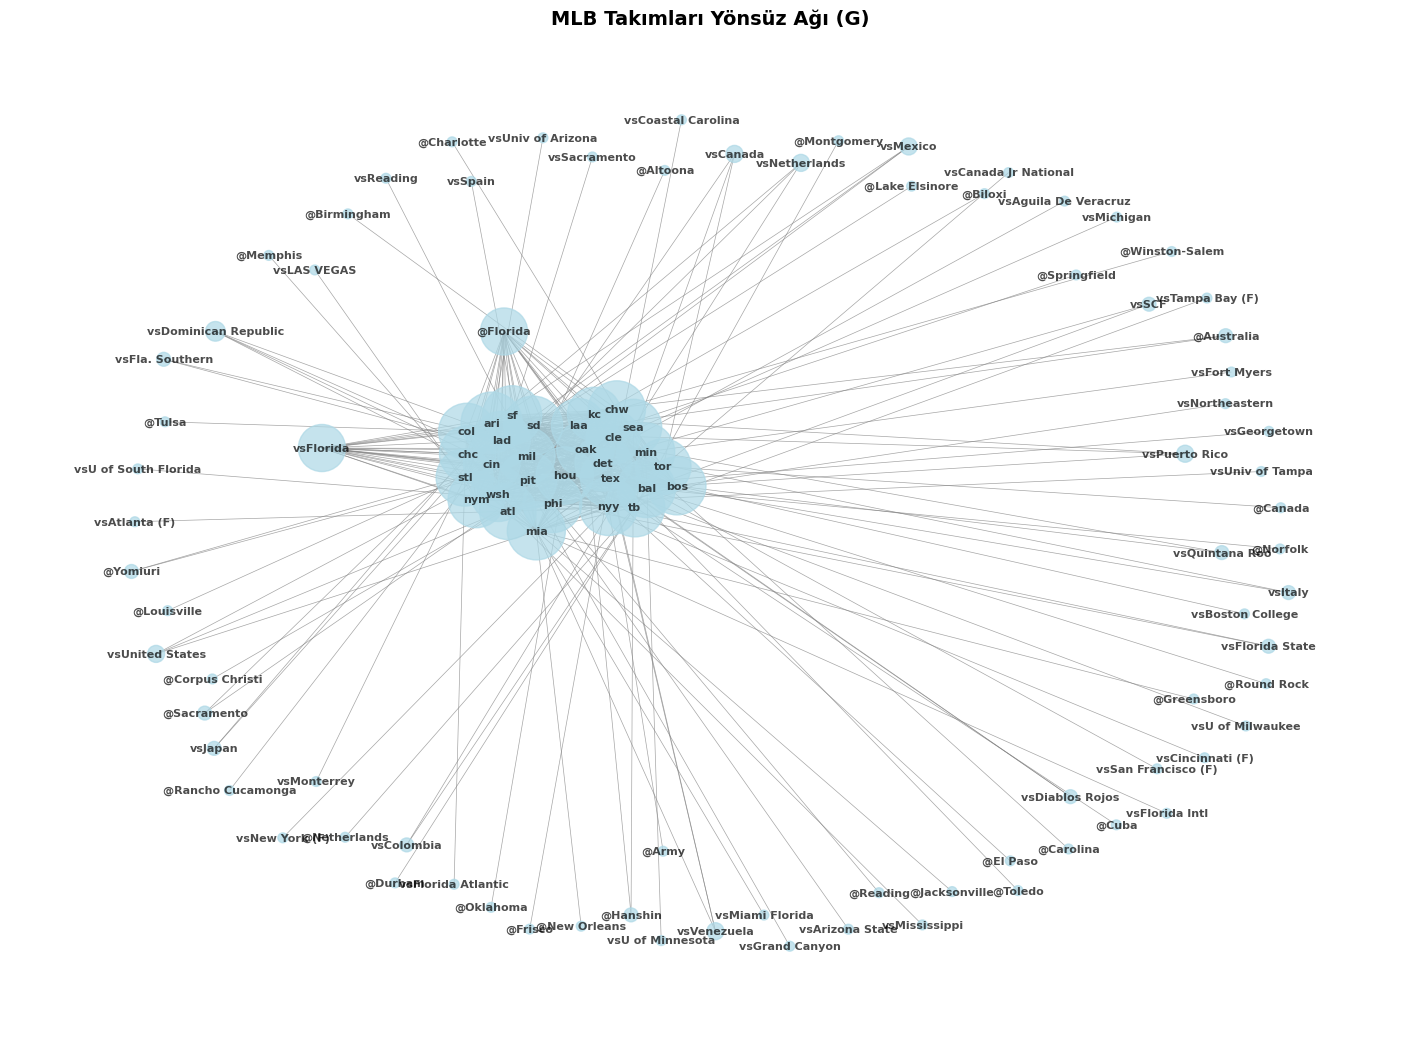

In [38]:
# Yönsüz ağı çizelim
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, k=2, iterations=50, seed=42)

# Düğüm derecelerine göre boyut belirle
node_sizes = [G.degree(node) * 50 for node in G.nodes()]

# Ağı çiz
nx.draw(G, pos, 
        with_labels=True, 
        node_color='lightblue', 
        node_size=node_sizes,
        font_size=8, 
        font_weight='bold',
        edge_color='gray',
        alpha=0.7,
        width=0.5)

plt.title('MLB Takımları Yönsüz Ağı (G)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 6. Yönlü Network (G_directed) Oluşturma ve Çizimi

In [41]:
# Yönlü ağ oluşturma (DiGraph)
G_directed = nx.DiGraph()

# Maçlardan kenarları ekleyelim (away_team -> home_team yönünde)
for _, row in games_df.iterrows():
    away_team = row['away_team']
    home_team = row['home_team']
    
    # Kenar zaten varsa ağırlığını artır, yoksa ekle
    if G_directed.has_edge(away_team, home_team):
        G_directed[away_team][home_team]['weight'] += 1
    else:
        G_directed.add_edge(away_team, home_team, weight=1)

print("Yönlü Ağ (G_directed) Oluşturuldu!")
print(f"Düğüm sayısı: {G_directed.number_of_nodes()}")
print(f"Kenar sayısı: {G_directed.number_of_edges()}")

Yönlü Ağ (G_directed) Oluşturuldu!
Düğüm sayısı: 109
Kenar sayısı: 1014


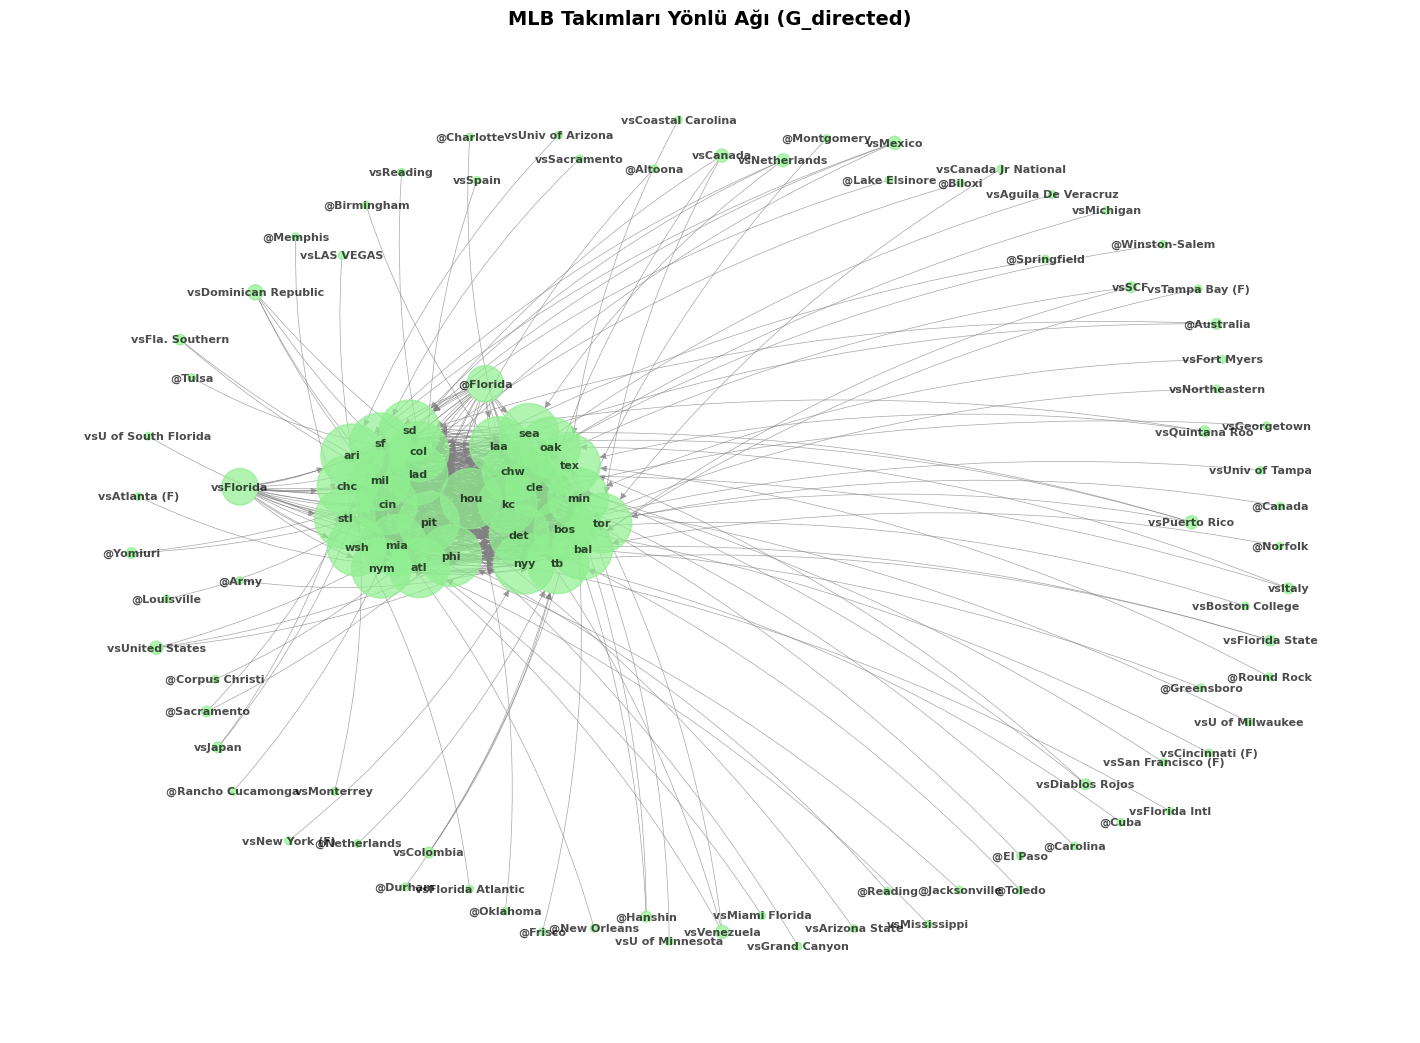

In [43]:
# Yönlü ağı çizelim
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G_directed, k=2, iterations=50, seed=42)

# Düğüm derecelerine göre boyut belirle
node_sizes = [G_directed.degree(node) * 30 for node in G_directed.nodes()]

# Ağı çiz
nx.draw(G_directed, pos, 
        with_labels=True, 
        node_color='lightgreen', 
        node_size=node_sizes,
        font_size=8, 
        font_weight='bold',
        edge_color='gray',
        alpha=0.7,
        width=0.5,
        arrows=True,
        arrowsize=10,
        connectionstyle="arc3,rad=0.1")

plt.title('MLB Takımları Yönlü Ağı (G_directed)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 7. G Network için Tüm Düğümlerin Dereceleri

In [46]:
# Tüm düğümlerin derecelerini listeleyelim
print("=" * 50)
print("G Network - Düğüm Dereceleri")
print("=" * 50)

degrees = dict(G.degree())
degrees_sorted = sorted(degrees.items(), key=lambda x: x[1], reverse=True)

# DataFrame olarak gösterelim
degrees_df = pd.DataFrame(degrees_sorted, columns=['Takım', 'Derece'])
print(degrees_df.to_string(index=False))

print(f"\nMaksimum derece: {max(degrees.values())} ({max(degrees, key=degrees.get)})")
print(f"Minimum derece: {min(degrees.values())} ({min(degrees, key=degrees.get)})")

G Network - Düğüm Dereceleri
               Takım  Derece
                 ari      39
                 tex      37
                  tb      37
                  sf      36
                  sd      36
                 phi      36
                 min      35
                 nyy      35
                 pit      35
                 bal      35
                 bos      35
                 mia      35
                 chw      34
                 lad      34
                 oak      34
                 mil      34
                 hou      34
                 stl      34
                 chc      33
                 sea      33
                 cin      33
                 col      33
                 atl      33
                 det      33
                 nym      33
                 tor      32
                 wsh      32
                 laa      30
                 cle      30
                  kc      30
           vsFlorida      23
            @Florida      23
vsDominican Re

## 8. G Network için Ortalama Derece

In [49]:
# Ortalama dereceyi hesaplayalım
total_degree = sum(dict(G.degree()).values())
num_nodes = G.number_of_nodes()
average_degree = total_degree / num_nodes

print("=" * 50)
print("G Network - Ortalama Derece")
print("=" * 50)
print(f"Toplam derece: {total_degree}")
print(f"Düğüm sayısı: {num_nodes}")
print(f"Ortalama Derece: {average_degree:.4f}")

G Network - Ortalama Derece
Toplam derece: 1170
Düğüm sayısı: 109
Ortalama Derece: 10.7339


## 9. G Network için Derece Histogramı

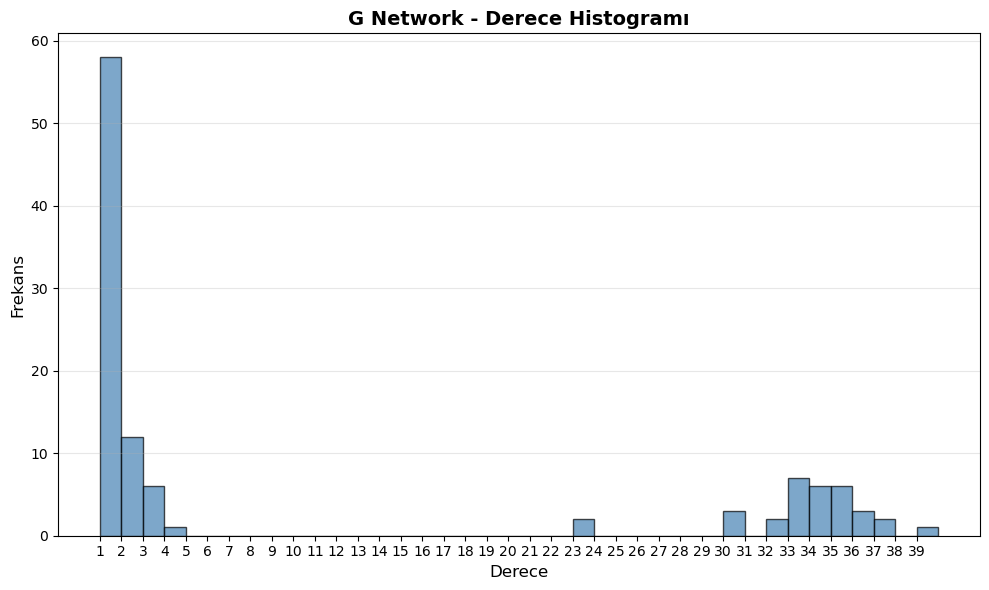

In [52]:
# Derece histogramı çizelim
plt.figure(figsize=(10, 6))

degree_values = [d for n, d in G.degree()]
plt.hist(degree_values, bins=range(min(degree_values), max(degree_values) + 2), 
         edgecolor='black', alpha=0.7, color='steelblue')

plt.xlabel('Derece', fontsize=12)
plt.ylabel('Frekans', fontsize=12)
plt.title('G Network - Derece Histogramı', fontsize=14, fontweight='bold')
plt.xticks(range(min(degree_values), max(degree_values) + 1))
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 10. G Network için Degree Centrality

In [54]:
# Degree Centrality hesaplayalım
degree_centrality = nx.degree_centrality(G)
degree_centrality_sorted = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)

print("=" * 50)
print("G Network - Degree Centrality")
print("=" * 50)

dc_df = pd.DataFrame(degree_centrality_sorted, columns=['Takım', 'Degree Centrality'])
print(dc_df.to_string(index=False))

print(f"\nEn yüksek Degree Centrality: {degree_centrality_sorted[0][0]} ({degree_centrality_sorted[0][1]:.4f})")
print(f"En düşük Degree Centrality: {degree_centrality_sorted[-1][0]} ({degree_centrality_sorted[-1][1]:.4f})")

G Network - Degree Centrality
               Takım  Degree Centrality
                 ari           0.361111
                 tex           0.342593
                  tb           0.342593
                  sf           0.333333
                  sd           0.333333
                 phi           0.333333
                 min           0.324074
                 nyy           0.324074
                 pit           0.324074
                 bal           0.324074
                 bos           0.324074
                 mia           0.324074
                 chw           0.314815
                 lad           0.314815
                 oak           0.314815
                 mil           0.314815
                 hou           0.314815
                 stl           0.314815
                 chc           0.305556
                 sea           0.305556
                 cin           0.305556
                 col           0.305556
                 atl           0.305556
          

## 11. G Network için Closeness Centrality

In [58]:
# Closeness Centrality hesaplayalım
closeness_centrality = nx.closeness_centrality(G)
closeness_centrality_sorted = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)

print("=" * 50)
print("G Network - Closeness Centrality")
print("=" * 50)

cc_df = pd.DataFrame(closeness_centrality_sorted, columns=['Takım', 'Closeness Centrality'])
print(cc_df.to_string(index=False))

print(f"\nEn yüksek Closeness Centrality: {closeness_centrality_sorted[0][0]} ({closeness_centrality_sorted[0][1]:.4f})")
print(f"En düşük Closeness Centrality: {closeness_centrality_sorted[-1][0]} ({closeness_centrality_sorted[-1][1]:.4f})")

G Network - Closeness Centrality
               Takım  Closeness Centrality
                 ari              0.610169
                 tex              0.603352
                  tb              0.603352
                  sf              0.600000
                  sd              0.600000
                 phi              0.600000
                 min              0.596685
                 nyy              0.596685
                 pit              0.596685
                 bal              0.596685
                 bos              0.596685
                 mia              0.596685
                 chw              0.593407
                 lad              0.593407
                 oak              0.593407
                 mil              0.593407
                 hou              0.593407
                 stl              0.593407
                 chc              0.590164
                 sea              0.590164
                 cin              0.590164
                 col 

## 12. G Network için Betweenness Centrality

In [61]:
# Betweenness Centrality hesaplayalım
betweenness_centrality = nx.betweenness_centrality(G)
betweenness_centrality_sorted = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)

print("=" * 50)
print("G Network - Betweenness Centrality")
print("=" * 50)

bc_df = pd.DataFrame(betweenness_centrality_sorted, columns=['Takım', 'Betweenness Centrality'])
print(bc_df.to_string(index=False))

print(f"\nEn yüksek Betweenness Centrality: {betweenness_centrality_sorted[0][0]} ({betweenness_centrality_sorted[0][1]:.4f})")
print(f"En düşük Betweenness Centrality: {betweenness_centrality_sorted[-1][0]} ({betweenness_centrality_sorted[-1][1]:.4f})")

G Network - Betweenness Centrality
               Takım  Betweenness Centrality
                 ari                0.101634
                  tb                0.099644
                 mia                0.096227
                 tex                0.078097
                 nyy                0.073050
                 phi                0.068044
                  sf                0.060674
                 chw                0.060652
                  sd                0.056809
                 hou                0.055338
                 stl                0.055338
                 min                0.051386
                 pit                0.049958
                 bos                0.048502
                 mil                0.042935
                 tor                0.042287
                 bal                0.040786
                 cin                0.037166
                 atl                0.037166
                 nym                0.037166
                 oak

## 13. G Network için Eigenvector Centrality

In [64]:
# Eigenvector Centrality hesaplayalım
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)
eigenvector_centrality_sorted = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)

print("=" * 50)
print("G Network - Eigenvector Centrality")
print("=" * 50)

ec_df = pd.DataFrame(eigenvector_centrality_sorted, columns=['Takım', 'Eigenvector Centrality'])
print(ec_df.to_string(index=False))

print(f"\nEn yüksek Eigenvector Centrality: {eigenvector_centrality_sorted[0][0]} ({eigenvector_centrality_sorted[0][1]:.4f})")
print(f"En düşük Eigenvector Centrality: {eigenvector_centrality_sorted[-1][0]} ({eigenvector_centrality_sorted[-1][1]:.4f})")

G Network - Eigenvector Centrality
               Takım  Eigenvector Centrality
                 ari                0.182131
                  sd                0.181366
                 tex                0.181351
                  sf                0.181171
                 bal                0.181167
                 phi                0.181160
                 bos                0.180980
                 pit                0.180978
                  tb                0.180795
                 min                0.180790
                 lad                0.180608
                 mil                0.180396
                 col                0.180224
                 chc                0.180220
                 det                0.180034
                 hou                0.180033
                 stl                0.180033
                 cin                0.179843
                 atl                0.179843
                 nym                0.179843
                 wsh

## 14. G Network için Katz Centrality

In [67]:
# Katz Centrality hesaplayalım
# Alpha değeri, en büyük özdeğerin tersinden küçük olmalıdır
try:
    katz_centrality = nx.katz_centrality(G, alpha=0.01, beta=1.0, max_iter=1000)
    katz_centrality_sorted = sorted(katz_centrality.items(), key=lambda x: x[1], reverse=True)

    print("=" * 50)
    print("G Network - Katz Centrality")
    print("=" * 50)

    kc_df = pd.DataFrame(katz_centrality_sorted, columns=['Takım', 'Katz Centrality'])
    print(kc_df.to_string(index=False))

    print(f"\nEn yüksek Katz Centrality: {katz_centrality_sorted[0][0]} ({katz_centrality_sorted[0][1]:.4f})")
    print(f"En düşük Katz Centrality: {katz_centrality_sorted[-1][0]} ({katz_centrality_sorted[-1][1]:.4f})")
except:
    print("Katz Centrality hesaplanamadı. Alternatif yöntem deneniyor...")
    katz_centrality = nx.katz_centrality_numpy(G)
    katz_centrality_sorted = sorted(katz_centrality.items(), key=lambda x: x[1], reverse=True)
    kc_df = pd.DataFrame(katz_centrality_sorted, columns=['Takım', 'Katz Centrality'])
    print(kc_df.to_string(index=False))

G Network - Katz Centrality
               Takım  Katz Centrality
                 ari         0.125662
                 tex         0.123995
                  tb         0.123959
                  sd         0.123188
                 phi         0.123175
                  sf         0.123174
                 bal         0.122366
                 pit         0.122354
                 bos         0.122354
                 min         0.122342
                 nyy         0.121847
                 mia         0.121799
                 lad         0.121523
                 mil         0.121509
                 hou         0.121486
                 stl         0.121486
                 oak         0.121268
                 chw         0.121244
                 col         0.120690
                 chc         0.120690
                 det         0.120678
                 cin         0.120665
                 atl         0.120665
                 nym         0.120665
                 sea  

## 15. G Network için PageRank Centrality

In [70]:
# PageRank Centrality hesaplayalım
pagerank_centrality = nx.pagerank(G, alpha=0.85)
pagerank_centrality_sorted = sorted(pagerank_centrality.items(), key=lambda x: x[1], reverse=True)

print("=" * 50)
print("G Network - PageRank Centrality")
print("=" * 50)

pr_df = pd.DataFrame(pagerank_centrality_sorted, columns=['Takım', 'PageRank'])
print(pr_df.to_string(index=False))

print(f"\nEn yüksek PageRank: {pagerank_centrality_sorted[0][0]} ({pagerank_centrality_sorted[0][1]:.4f})")
print(f"En düşük PageRank: {pagerank_centrality_sorted[-1][0]} ({pagerank_centrality_sorted[-1][1]:.4f})")

G Network - PageRank Centrality
               Takım  PageRank
                  tb  0.033022
                 ari  0.032876
                 mia  0.032204
                 phi  0.031833
                 nyy  0.031504
                 tex  0.031142
                  sf  0.030609
                 stl  0.030458
                 hou  0.030155
                 bos  0.030031
                 atl  0.029875
                 nym  0.029838
                  sd  0.029623
                 lad  0.029429
                 chw  0.029371
                 pit  0.029265
                 min  0.029095
                 bal  0.029080
                 tor  0.029059
                 det  0.028866
                 mil  0.028853
                 wsh  0.028826
                 cin  0.028534
                 chc  0.028288
                 oak  0.028152
                 col  0.028111
                 cle  0.027337
                 sea  0.026919
                  kc  0.026469
                 laa  0.025763
       

## 16. G Network için Modularity

In [72]:
# Modularity hesaplamak için önce toplulukları (communities) bulalım
from networkx.algorithms.community import greedy_modularity_communities, modularity

# Greedy modularity algoritması ile toplulukları bulalım
communities = list(greedy_modularity_communities(G))

print("=" * 50)
print("G Network - Modularity")
print("=" * 50)

print(f"\nBulunan topluluk sayısı: {len(communities)}")
print("\nTopluluklar:")
for i, community in enumerate(communities, 1):
    print(f"Topluluk {i}: {sorted(list(community))}")

# Modularity değerini hesaplayalım
modularity_value = modularity(G, communities)
print(f"\nModularity Değeri: {modularity_value:.4f}")

G Network - Modularity

Bulunan topluluk sayısı: 9

Topluluklar:
Topluluk 1: ['@Australia', '@El Paso', '@Frisco', '@Lake Elsinore', '@Rancho Cucamonga', '@Round Rock', 'ari', 'lad', 'sd', 'tex', 'vsArizona State', 'vsCoastal Carolina', 'vsDiablos Rojos', 'vsFlorida', 'vsGrand Canyon', 'vsMexico', 'vsMonterrey', 'vsNetherlands', 'vsQuintana Roo', 'vsUniv of Arizona']
Topluluk 2: ['@Florida', '@Louisville', '@Tulsa', 'atl', 'bos', 'cin', 'col', 'laa', 'nym', 'vsAtlanta (F)', 'vsBoston College', 'vsCincinnati (F)', 'vsGeorgetown', 'vsLAS VEGAS', 'vsMichigan', 'vsMississippi', 'vsNortheastern', 'vsPuerto Rico', 'wsh']
Topluluk 3: ['@Altoona', '@Army', '@Norfolk', '@Reading', '@Toledo', 'bal', 'det', 'nyy', 'phi', 'pit', 'vsDominican Republic', 'vsFla. Southern', 'vsFlorida State', 'vsNew York (F)', 'vsReading', 'vsSCF', 'vsSpain', 'vsU of South Florida', 'vsUniv of Tampa']
Topluluk 4: ['@Birmingham', '@Charlotte', '@Cuba', '@Durham', '@Montgomery', '@Netherlands', '@Winston-Salem', 'chw',

## 17. G Network için Density

In [74]:
# Density (Yoğunluk) hesaplayalım
density = nx.density(G)

print("=" * 50)
print("G Network - Density (Yoğunluk)")
print("=" * 50)

n = G.number_of_nodes()
m = G.number_of_edges()
max_edges = n * (n - 1) / 2

print(f"Düğüm sayısı (n): {n}")
print(f"Kenar sayısı (m): {m}")
print(f"Maksimum olası kenar sayısı: {max_edges:.0f}")
print(f"\nDensity = 2m / n(n-1) = {density:.4f}")

G Network - Density (Yoğunluk)
Düğüm sayısı (n): 109
Kenar sayısı (m): 585
Maksimum olası kenar sayısı: 5886

Density = 2m / n(n-1) = 0.0994


## 18. G Network için Average Clustering

In [78]:
# Average Clustering Coefficient hesaplayalım
avg_clustering = nx.average_clustering(G)

# Her düğümün kümeleme katsayısı
clustering_coeffs = nx.clustering(G)
clustering_sorted = sorted(clustering_coeffs.items(), key=lambda x: x[1], reverse=True)

print("=" * 50)
print("G Network - Average Clustering Coefficient")
print("=" * 50)

print("\nHer düğümün kümeleme katsayısı:")
clust_df = pd.DataFrame(clustering_sorted, columns=['Takım', 'Clustering Coefficient'])
print(clust_df.to_string(index=False))

print(f"\nOrtalama Kümeleme Katsayısı: {avg_clustering:.4f}")

G Network - Average Clustering Coefficient

Her düğümün kümeleme katsayısı:
               Takım  Clustering Coefficient
           vsFlorida                1.000000
     vsUnited States                1.000000
     vsFla. Southern                1.000000
            @Florida                1.000000
         vsVenezuela                1.000000
          vsColombia                1.000000
               vsSCF                1.000000
vsDominican Republic                1.000000
       vsPuerto Rico                1.000000
     vsFlorida State                1.000000
            vsCanada                1.000000
            @Yomiuri                1.000000
            @Hanshin                1.000000
         @Sacramento                1.000000
             vsItaly                1.000000
       vsNetherlands                1.000000
     vsDiablos Rojos                1.000000
      vsQuintana Roo                1.000000
             vsJapan                1.000000
            vsMexico    

## 19. G Network için Diameter

In [82]:
# Diameter hesaplayalım
# Önce ağın bağlı olup olmadığını kontrol edelim
print("=" * 50)
print("G Network - Diameter (Çap)")
print("=" * 50)

if nx.is_connected(G):
    diameter = nx.diameter(G)
    radius = nx.radius(G)
    
    print(f"Ağ bağlı mı: Evet")
    print(f"Diameter (Çap): {diameter}")
    print(f"Radius (Yarıçap): {radius}")
    
    # Eccentricity değerleri
    eccentricity = nx.eccentricity(G)
    ecc_sorted = sorted(eccentricity.items(), key=lambda x: x[1])
    print(f"\nEccentricity değerleri:")
    ecc_df = pd.DataFrame(ecc_sorted, columns=['Takım', 'Eccentricity'])
    print(ecc_df.to_string(index=False))
else:
    print("Ağ bağlı değil. En büyük bağlı bileşen üzerinden hesaplanıyor...")
    largest_cc = max(nx.connected_components(G), key=len)
    subgraph = G.subgraph(largest_cc)
    diameter = nx.diameter(subgraph)
    print(f"En büyük bağlı bileşen için Diameter: {diameter}")

G Network - Diameter (Çap)
Ağ bağlı mı: Evet
Diameter (Çap): 3
Radius (Yarıçap): 2

Eccentricity değerleri:
               Takım  Eccentricity
                 chw             2
                 laa             2
                 lad             2
                 chc             2
                 sea             2
                  sf             2
                 oak             2
                 cle             2
                 mil             2
                 cin             2
                  kc             2
                 col             2
                  sd             2
                 ari             2
                 tex             2
                 atl             2
                 min             2
                 tor             2
                  tb             2
                 nyy             2
                 det             2
                 pit             2
                 wsh             2
                 bal             2
                 

## 20. G Network için Derece Dağılımı

G Network - Derece Dağılımı

Derece : Frekans
  1    :    58
  2    :    12
  3    :    6
  4    :    1
  23    :    2
  30    :    3
  32    :    2
  33    :    7
  34    :    6
  35    :    6
  36    :    3
  37    :    2
  39    :    1


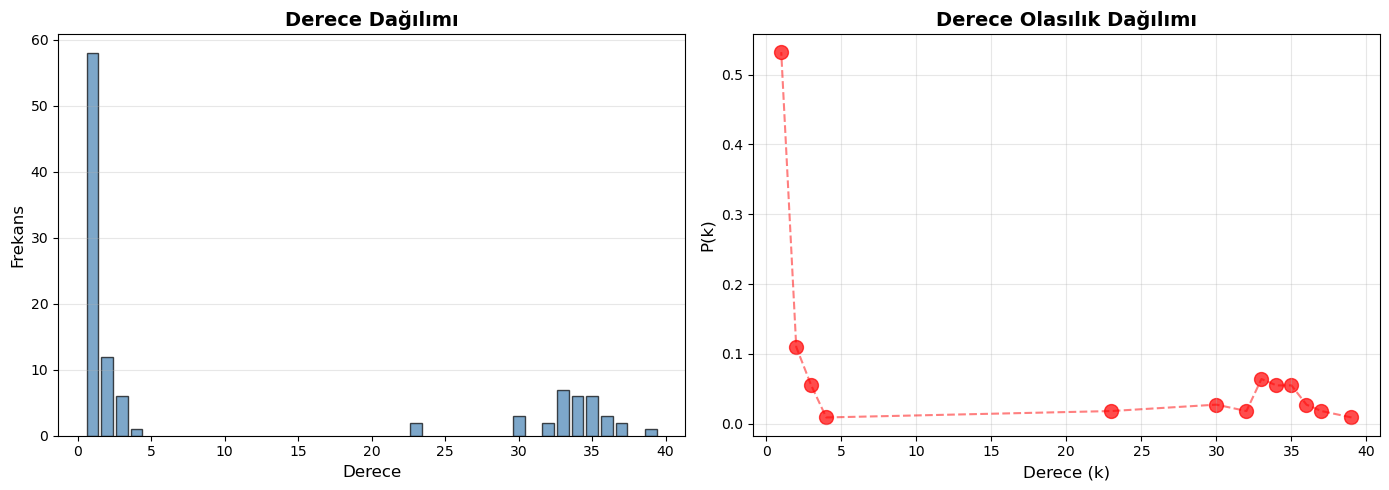

In [85]:
# Derece dağılımını hesaplayalım ve çizelim
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degree_count = Counter(degree_sequence)

print("=" * 50)
print("G Network - Derece Dağılımı")
print("=" * 50)

print("\nDerece : Frekans")
for degree in sorted(degree_count.keys()):
    print(f"  {degree}    :    {degree_count[degree]}")

# Derece dağılımı grafiği
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Sol grafik: Derece dağılımı (bar chart)
degrees = list(degree_count.keys())
frequencies = list(degree_count.values())
axes[0].bar(degrees, frequencies, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Derece', fontsize=12)
axes[0].set_ylabel('Frekans', fontsize=12)
axes[0].set_title('Derece Dağılımı', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Sağ grafik: Kümülatif derece dağılımı
# P(k) olasılık dağılımı
n_nodes = G.number_of_nodes()
prob = {k: v / n_nodes for k, v in degree_count.items()}
axes[1].scatter(list(prob.keys()), list(prob.values()), color='red', s=100, alpha=0.7)
axes[1].plot(list(prob.keys()), list(prob.values()), 'r--', alpha=0.5)
axes[1].set_xlabel('Derece (k)', fontsize=12)
axes[1].set_ylabel('P(k)', fontsize=12)
axes[1].set_title('Derece Olasılık Dağılımı', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 21. Tüm Metriklerin Özet Tablosu

In [87]:
# Tüm centrality metriklerini bir tabloda birleştirelim
centrality_df = pd.DataFrame({
    'Takım': list(G.nodes()),
    'Derece': [G.degree(n) for n in G.nodes()],
    'Degree Centrality': [degree_centrality[n] for n in G.nodes()],
    'Closeness Centrality': [closeness_centrality[n] for n in G.nodes()],
    'Betweenness Centrality': [betweenness_centrality[n] for n in G.nodes()],
    'Eigenvector Centrality': [eigenvector_centrality[n] for n in G.nodes()],
    'Katz Centrality': [katz_centrality[n] for n in G.nodes()],
    'PageRank': [pagerank_centrality[n] for n in G.nodes()],
    'Clustering Coeff': [clustering_coeffs[n] for n in G.nodes()]
})

# Degree Centrality'e göre sırala
centrality_df = centrality_df.sort_values('Degree Centrality', ascending=False)

print("=" * 100)
print("TÜM CENTRALITY METRİKLERİ ÖZET TABLOSU")
print("=" * 100)
print(centrality_df.to_string(index=False))

# Ağ özet istatistikleri
print("\n" + "=" * 100)
print("AĞ GENEL İSTATİSTİKLERİ")
print("=" * 100)
print(f"Düğüm Sayısı: {G.number_of_nodes()}")
print(f"Kenar Sayısı: {G.number_of_edges()}")
print(f"Ortalama Derece: {average_degree:.4f}")
print(f"Density (Yoğunluk): {density:.4f}")
print(f"Average Clustering: {avg_clustering:.4f}")
print(f"Modularity: {modularity_value:.4f}")
if nx.is_connected(G):
    print(f"Diameter: {diameter}")
    print(f"Radius: {radius}")

TÜM CENTRALITY METRİKLERİ ÖZET TABLOSU
               Takım  Derece  Degree Centrality  Closeness Centrality  Betweenness Centrality  Eigenvector Centrality  Katz Centrality  PageRank  Clustering Coeff
                 ari      39           0.361111              0.610169                0.101634                0.182131         0.125662  0.032876          0.615385
                  tb      37           0.342593              0.603352                0.099644                0.180795         0.123959  0.033022          0.677177
                 tex      37           0.342593              0.603352                0.078097                0.181351         0.123995  0.031142          0.681682
                 phi      36           0.333333              0.600000                0.068044                0.181160         0.123175  0.031833          0.720635
                  sf      36           0.333333              0.600000                0.060674                0.181171         0.123174  0.030609  

## 22. Hesaplanan Tüm Metriklerin Yorumlanması

In [89]:
# Metriklerin yorumlanması
print("=" * 100)
print("MLB TAKIM AĞI METRİKLERİNİN YORUMLANMASI")
print("=" * 100)

print("""
1. DERECE (DEGREE) ANALİZİ:
   - Derece, bir takımın kaç farklı takımla maç yaptığını gösterir.
   - Tüm takımların benzer derecelere sahip olması, MLB'nin dengeli bir lig yapısına
     sahip olduğunu gösterir. Her takım çoğu diğer takımla en az bir kez karşılaşmaktadır.
""")

print(f"""
2. DEGREE CENTRALITY:
   - Değer aralığı: 0-1 arasında normalize edilmiş değerler
   - Yüksek değerler, takımın ağda daha merkezi bir konumda olduğunu gösterir.
   - En yüksek: {degree_centrality_sorted[0][0]} ({degree_centrality_sorted[0][1]:.4f})
   - MLB'de tüm takımlar birbirleriyle oynama şansına sahip olduğu için değerler birbirine yakındır.
""")

print(f"""
3. CLOSENESS CENTRALITY:
   - Bir düğümün diğer tüm düğümlere olan ortalama en kısa yol uzunluğunun tersidir.
   - Yüksek değer = Takım, diğer takımlara daha "yakın"dır.
   - En yüksek: {closeness_centrality_sorted[0][0]} ({closeness_centrality_sorted[0][1]:.4f})
   - Yüksek closeness centrality, bilgi veya etkinin hızlı yayılabileceğini gösterir.
""")

print(f"""
4. BETWEENNESS CENTRALITY:
   - Bir düğümün, diğer düğüm çiftleri arasındaki en kısa yollarda ne sıklıkla yer aldığını ölçer.
   - Yüksek değer = Takım, ağda "köprü" rolü üstlenir.
   - En yüksek: {betweenness_centrality_sorted[0][0]} ({betweenness_centrality_sorted[0][1]:.4f})
   - MLB ağında bu değerin düşük olması, ağın yoğun bağlantılı olduğunu gösterir.
""")

print(f"""
5. EIGENVECTOR CENTRALITY:
   - Bir düğümün önemini, bağlı olduğu düğümlerin önemine göre değerlendirir.
   - "Önemli takımlarla oynayan takımlar da önemlidir" mantığı.
   - En yüksek: {eigenvector_centrality_sorted[0][0]} ({eigenvector_centrality_sorted[0][1]:.4f})
""")

print(f"""
6. KATZ CENTRALITY:
   - Eigenvector centrality'nin genelleştirilmiş halidir.
   - Hem doğrudan hem de dolaylı bağlantıları dikkate alır.
   - En yüksek: {katz_centrality_sorted[0][0]} ({katz_centrality_sorted[0][1]:.4f})
""")

print(f"""
7. PAGERANK CENTRALITY:
   - Google'ın web sayfalarını sıralamak için kullandığı algoritmadır.
   - Rastgele gezinen bir kullanıcının hangi düğümde daha fazla zaman geçireceğini modeller.
   - En yüksek: {pagerank_centrality_sorted[0][0]} ({pagerank_centrality_sorted[0][1]:.4f})
   - MLB'de değerler yakın çünkü ağ yapısı dengeli.
""")

print(f"""
8. MODULARITY ({modularity_value:.4f}):
   - Ağın ne kadar iyi topluluklara ayrıldığını ölçer.
   - Değer aralığı: -0.5 ile 1 arasında
   - 0'a yakın değerler: Rastgele ağ yapısı
   - 1'e yakın değerler: Güçlü topluluk yapısı
   - Bulunan topluluk sayısı: {len(communities)}
   - MLB'de takımlar division ve league'lere göre gruplandırılmış olabilir.
""")

print(f"""
9. DENSITY (YOĞUNLUK) ({density:.4f}):
   - Mevcut kenar sayısının maksimum olası kenar sayısına oranı.
   - 1.0 = Tam bağlı ağ (her düğüm birbiriyle bağlı)
   - 0.0 = Hiç kenar yok
   - Yüksek yoğunluk, MLB'nin rekabetçi yapısını yansıtır - takımlar sık sık birbirleriyle karşılaşır.
""")

print(f"""
10. AVERAGE CLUSTERING COEFFICIENT ({avg_clustering:.4f}):
    - Bir düğümün komşularının birbirleriyle ne kadar bağlı olduğunu ölçer.
    - Yüksek değer = Yerel gruplaşma eğilimi yüksek
    - MLB'de yüksek kümeleme, aynı division'daki takımların birbirleriyle daha sık
      karşılaşmasından kaynaklanabilir.
""")

if nx.is_connected(G):
    print(f"""
11. DIAMETER (ÇAP) ({diameter}):
    - Ağdaki en uzun en kısa yol.
    - Düşük diameter = Ağ "küçük dünya" özelliği gösterir.
    - MLB ağında düşük diameter, herhangi iki takım arasında az sayıda "adım" olduğunu gösterir.
    
12. RADIUS (YARIÇAP) ({radius}):
    - Merkezdeki düğümlerden diğer düğümlere olan maksimum mesafe.
    - Ağın ne kadar "kompakt" olduğunu gösterir.
""")

print("""
13. DERECE DAĞILIMI:
    - Ağdaki düğümlerin derece dağılımını gösterir.
    - Eğer dağılım normal dağılıma benziyorsa: Rastgele ağ
    - Eğer güç yasası (power-law) dağılımı varsa: Ölçeksiz ağ
    - MLB ağında dereceler benzer olduğundan, bu düzenli/organize bir ağ yapısına işaret eder.
    
GENEL DEĞERLENDİRME:
    - MLB takım ağı, yüksek yoğunluklu ve düşük çaplı bir ağdır.
    - Tüm takımlar birbirine erişilebilir konumdadır.
    - Merkezi metrikler (centrality) takımlar arasında dengeli dağılmıştır.
    - Bu, MLB'nin organize ve rekabetçi lig yapısını yansıtmaktadır.
""")

print("=" * 100)

MLB TAKIM AĞI METRİKLERİNİN YORUMLANMASI

1. DERECE (DEGREE) ANALİZİ:
   - Derece, bir takımın kaç farklı takımla maç yaptığını gösterir.
   - Tüm takımların benzer derecelere sahip olması, MLB'nin dengeli bir lig yapısına
     sahip olduğunu gösterir. Her takım çoğu diğer takımla en az bir kez karşılaşmaktadır.


2. DEGREE CENTRALITY:
   - Değer aralığı: 0-1 arasında normalize edilmiş değerler
   - Yüksek değerler, takımın ağda daha merkezi bir konumda olduğunu gösterir.
   - En yüksek: ari (0.3611)
   - MLB'de tüm takımlar birbirleriyle oynama şansına sahip olduğu için değerler birbirine yakındır.


3. CLOSENESS CENTRALITY:
   - Bir düğümün diğer tüm düğümlere olan ortalama en kısa yol uzunluğunun tersidir.
   - Yüksek değer = Takım, diğer takımlara daha "yakın"dır.
   - En yüksek: ari (0.6102)
   - Yüksek closeness centrality, bilgi veya etkinin hızlı yayılabileceğini gösterir.


4. BETWEENNESS CENTRALITY:
   - Bir düğümün, diğer düğüm çiftleri arasındaki en kısa yollarda ne sıklıkl

## 23. Centrality Metrikleri Görselleştirmesi

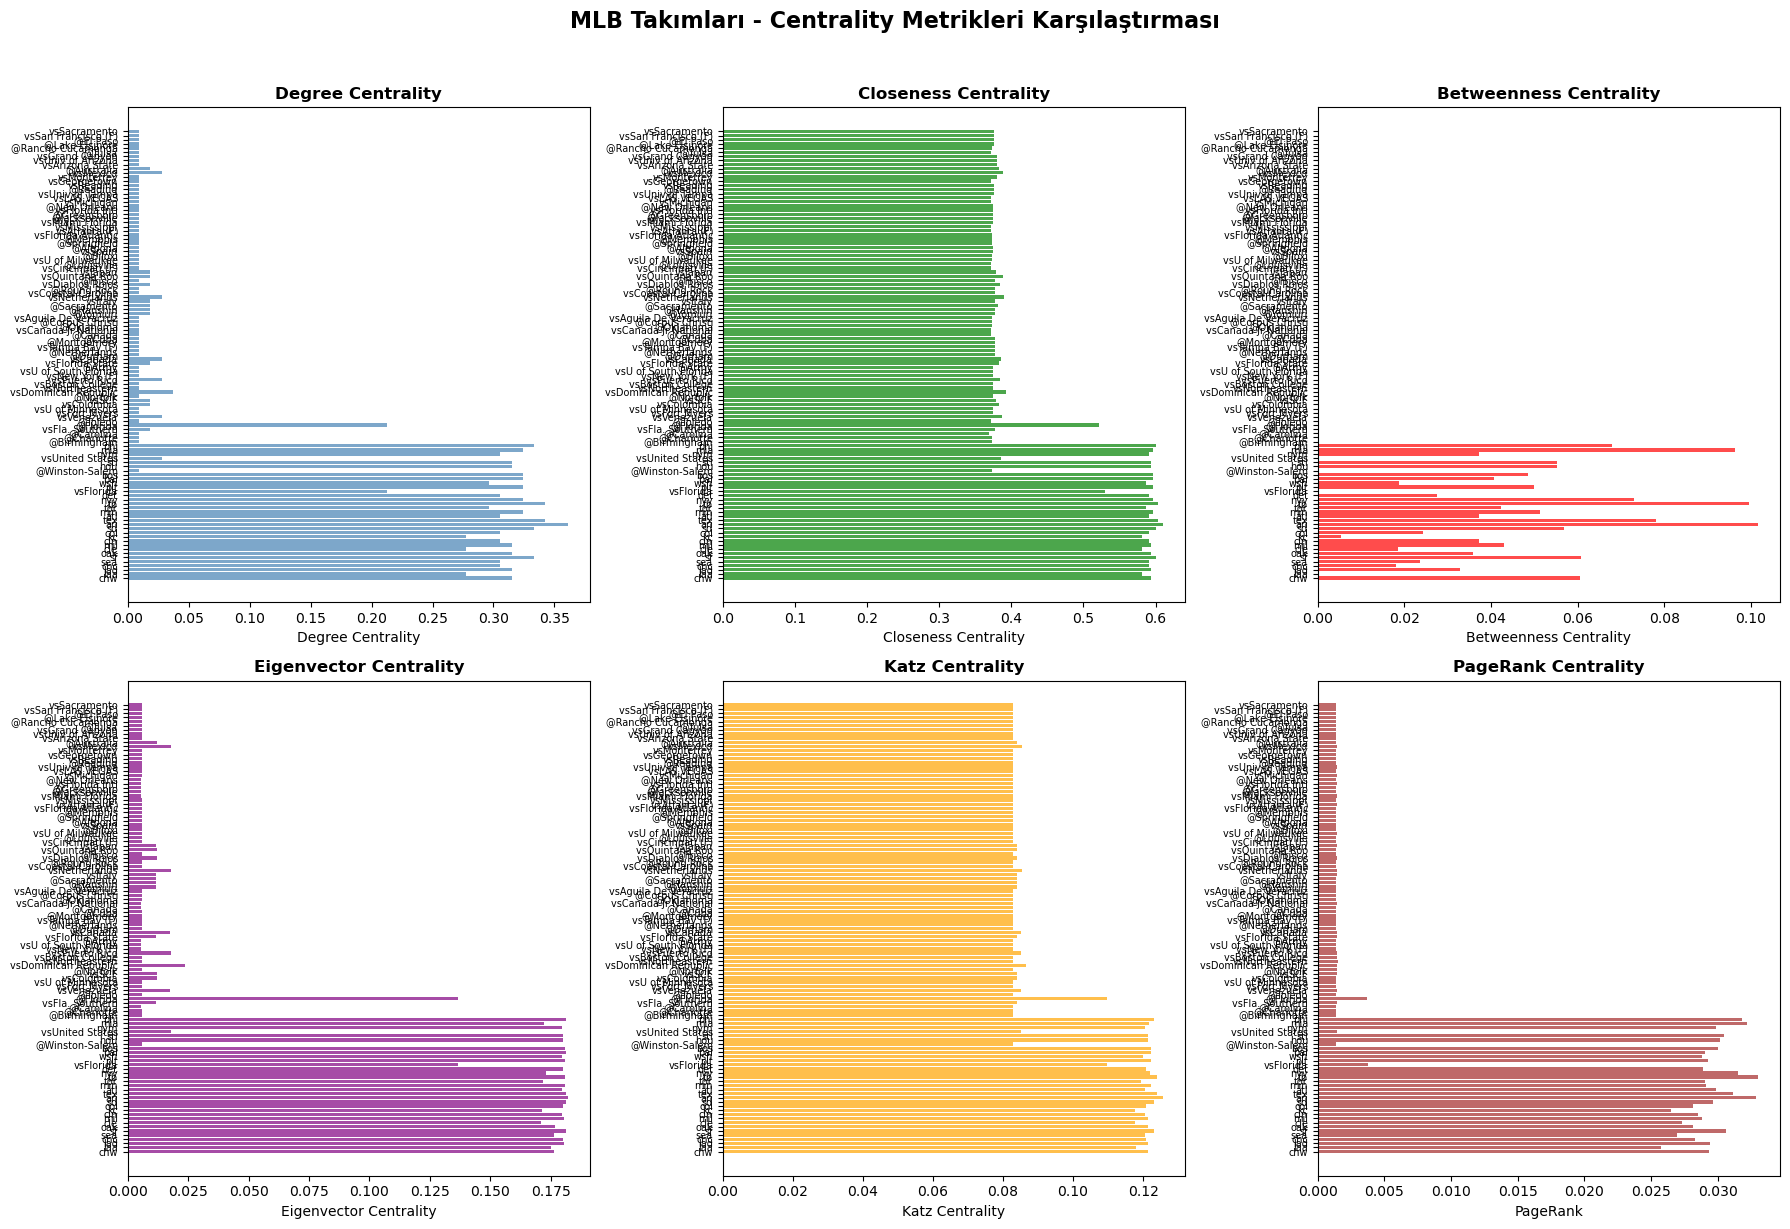

In [94]:
# Centrality metriklerini görselleştirelim
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Verileri hazırlayalım
teams = list(G.nodes())
dc_values = [degree_centrality[t] for t in teams]
cc_values = [closeness_centrality[t] for t in teams]
bc_values = [betweenness_centrality[t] for t in teams]
ec_values = [eigenvector_centrality[t] for t in teams]
kc_values = [katz_centrality[t] for t in teams]
pr_values = [pagerank_centrality[t] for t in teams]

# 1. Degree Centrality
axes[0, 0].barh(teams, dc_values, color='steelblue', alpha=0.7)
axes[0, 0].set_xlabel('Degree Centrality')
axes[0, 0].set_title('Degree Centrality', fontweight='bold')
axes[0, 0].tick_params(axis='y', labelsize=7)

# 2. Closeness Centrality
axes[0, 1].barh(teams, cc_values, color='green', alpha=0.7)
axes[0, 1].set_xlabel('Closeness Centrality')
axes[0, 1].set_title('Closeness Centrality', fontweight='bold')
axes[0, 1].tick_params(axis='y', labelsize=7)

# 3. Betweenness Centrality
axes[0, 2].barh(teams, bc_values, color='red', alpha=0.7)
axes[0, 2].set_xlabel('Betweenness Centrality')
axes[0, 2].set_title('Betweenness Centrality', fontweight='bold')
axes[0, 2].tick_params(axis='y', labelsize=7)

# 4. Eigenvector Centrality
axes[1, 0].barh(teams, ec_values, color='purple', alpha=0.7)
axes[1, 0].set_xlabel('Eigenvector Centrality')
axes[1, 0].set_title('Eigenvector Centrality', fontweight='bold')
axes[1, 0].tick_params(axis='y', labelsize=7)

# 5. Katz Centrality
axes[1, 1].barh(teams, kc_values, color='orange', alpha=0.7)
axes[1, 1].set_xlabel('Katz Centrality')
axes[1, 1].set_title('Katz Centrality', fontweight='bold')
axes[1, 1].tick_params(axis='y', labelsize=7)

# 6. PageRank
axes[1, 2].barh(teams, pr_values, color='brown', alpha=0.7)
axes[1, 2].set_xlabel('PageRank')
axes[1, 2].set_title('PageRank Centrality', fontweight='bold')
axes[1, 2].tick_params(axis='y', labelsize=7)

plt.suptitle('MLB Takımları - Centrality Metrikleri Karşılaştırması', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## 24. Topluluk (Community) Görselleştirmesi

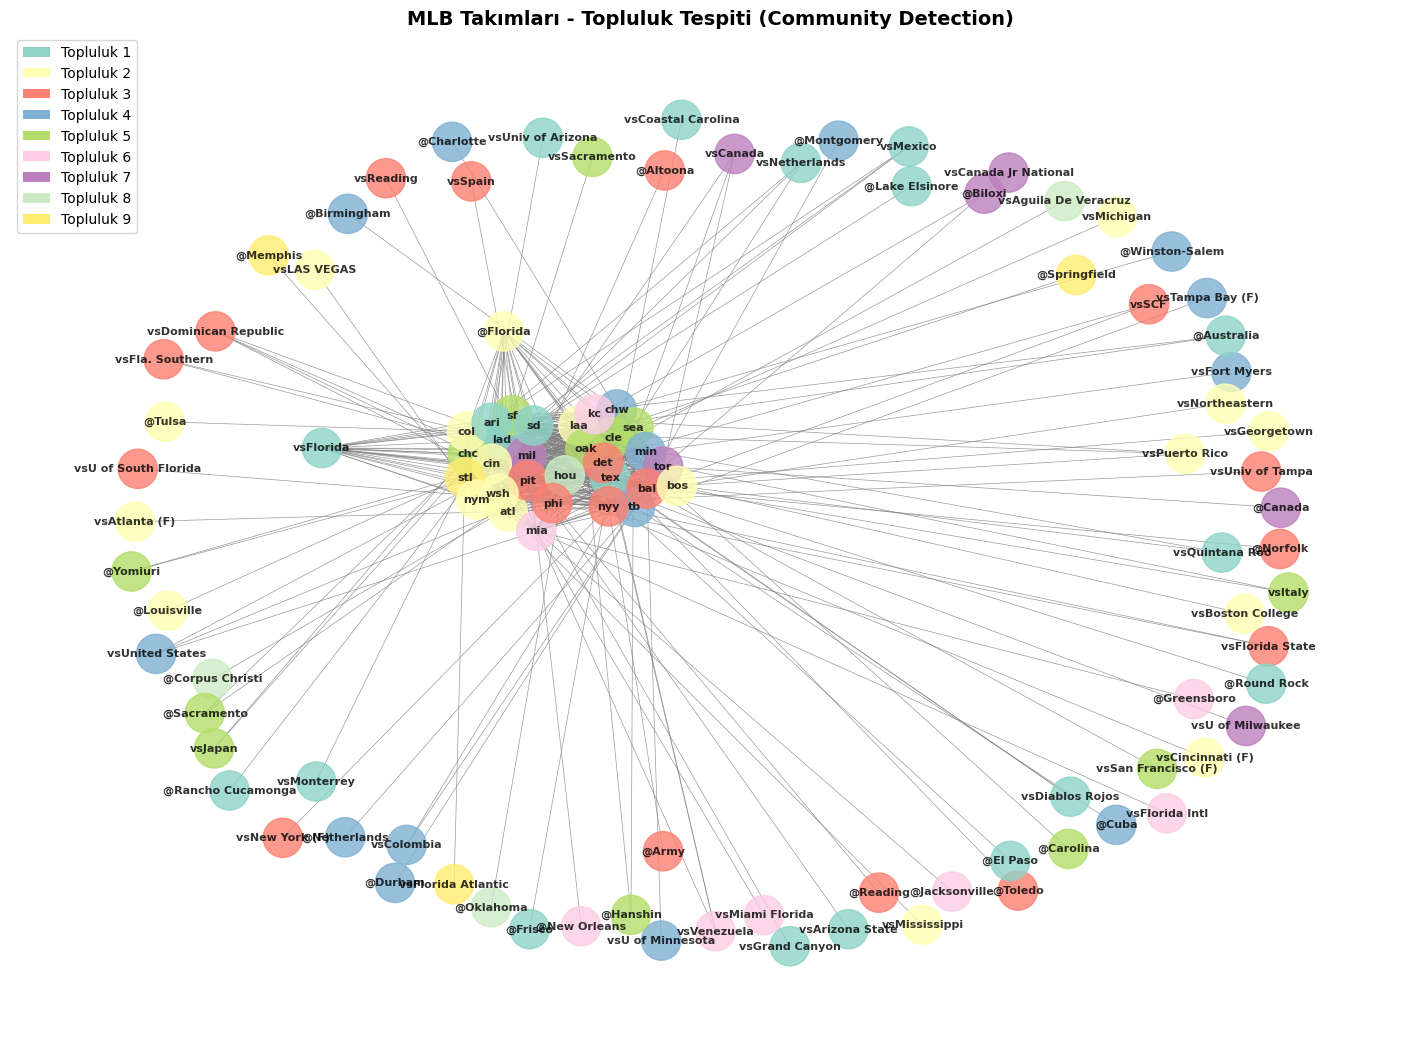


Topluluk üyelikleri:
Topluluk 1: ['@Australia', '@El Paso', '@Frisco', '@Lake Elsinore', '@Rancho Cucamonga', '@Round Rock', 'ari', 'lad', 'sd', 'tex', 'vsArizona State', 'vsCoastal Carolina', 'vsDiablos Rojos', 'vsFlorida', 'vsGrand Canyon', 'vsMexico', 'vsMonterrey', 'vsNetherlands', 'vsQuintana Roo', 'vsUniv of Arizona']
Topluluk 2: ['@Florida', '@Louisville', '@Tulsa', 'atl', 'bos', 'cin', 'col', 'laa', 'nym', 'vsAtlanta (F)', 'vsBoston College', 'vsCincinnati (F)', 'vsGeorgetown', 'vsLAS VEGAS', 'vsMichigan', 'vsMississippi', 'vsNortheastern', 'vsPuerto Rico', 'wsh']
Topluluk 3: ['@Altoona', '@Army', '@Norfolk', '@Reading', '@Toledo', 'bal', 'det', 'nyy', 'phi', 'pit', 'vsDominican Republic', 'vsFla. Southern', 'vsFlorida State', 'vsNew York (F)', 'vsReading', 'vsSCF', 'vsSpain', 'vsU of South Florida', 'vsUniv of Tampa']
Topluluk 4: ['@Birmingham', '@Charlotte', '@Cuba', '@Durham', '@Montgomery', '@Netherlands', '@Winston-Salem', 'chw', 'min', 'tb', 'vsColombia', 'vsFort Myers',

In [102]:
# Toplulukları renkli olarak görselleştirelim
plt.figure(figsize=(14, 10))

# Her topluluğa bir renk atayalım
colors = plt.cm.Set3(np.linspace(0, 1, len(communities)))
node_colors = []
for node in G.nodes():
    for i, community in enumerate(communities):
        if node in community:
            node_colors.append(colors[i])
            break

pos = nx.spring_layout(G, k=2, iterations=50, seed=42)

# Ağı çiz
nx.draw(G, pos, 
        with_labels=True, 
        node_color=node_colors, 
        node_size=800,
        font_size=8, 
        font_weight='bold',
        edge_color='gray',
        alpha=0.8,
        width=0.5)

# Legend ekleyelim
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=colors[i], label=f'Topluluk {i+1}') 
                   for i in range(len(communities))]
plt.legend(handles=legend_elements, loc='upper left', fontsize=10)

plt.title('MLB Takımları - Topluluk Tespiti (Community Detection)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nTopluluk üyelikleri:")
for i, community in enumerate(communities, 1):
    print(f"Topluluk {i}: {sorted(list(community))}")